# Proyecto 1 - Clasificación con Vader y KNN

Juan Camilo Sánchez – 201519337

Zharet Bautista Montes – 201812763

Leonel Andrés Polanía Arias - 201720141

### Primera revisión de los datos

Comenzamos por importar las librerías y cargar los datos para saber de qué disponemos

In [1]:
import pandas as pd, matplotlib.pyplot as plt, sklearn
rawdata = pd.read_csv('Reviews.csv')
print(rawdata.shape)
rawdata.sample(20)

(568454, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
542742,542743,B005UO5ZC4,A2QUCMH96IUFGK,Hollyhock,0,0,4,1283644800,Delicious but are they just candy?,"These little gels are indeed very tasty, but I..."
330365,330366,B005ERY2SU,A1FAXC74ATE576,Jennifer Heinz,0,0,5,1349913600,love it love it love it,I picked this up at Target(I do love Rick Bayl...
546737,546738,B005ZHGRH8,A1XAI08G1SA66C,Sandy,0,0,2,1337731200,Not as great as I thought it would be,I tried EB's other meals and this was not as g...
433693,433694,B001LQCOIS,A144R5WGD55XGA,MelMom,0,0,5,1282089600,"done the basic way, thumb up to beaba babycook",I did the most basic way with my first child u...
452847,452848,B003D4MYLS,A1ECHZVN5P0VV6,"Richard Brosnahan ""thebroz""",0,0,3,1328313600,"Good, but stale",Each tea bag is wrapped in packaging. The bott...
405484,405485,B005K4Q4LK,A23M4OJ8M461OW,"Lisa M. Matto ""harly""",0,0,5,1329436800,fantastic flavor!,"Ive yet to try other cappuccino flavors, but t..."
54284,54285,B001RDNB9G,A1YUL9PCJR3JTY,"O. Brown ""Ms. O. Khannah-Brown""",1,1,5,1283385600,"Green Tea with Jasmine, Nothing Else!",*****<br />Numi Tea's Monkey King Jasmine Gree...
213734,213735,B0039LVLS2,A3BBC8E7QT7N9I,P. Harding,0,2,3,1298505600,just ok,bought the three flavor variety selection. All...
378526,378527,B008FHUGNQ,AVU2IGP3BQ7HS,Mrs. Pam Donoghue,1,1,5,1285286400,It really IS jet fuel!!!!,I love the Coffee People monthly plan! This i...
421306,421307,B000P52FLW,AV6BQVVC1XE4E,Eric L. Fletcher,0,0,5,1284681600,Make poptarts taste like sawdust,"Love these, organic- with tons or real fruit. ..."


### Limpieza y preparación de datos

Definimos Score como la variable etiqueta, eliminamos los identificadores (Id, ProductId, UserId, ProfileName), así como la marca temporal Time, eliminamos todos los registros duplicados, aquellos con valor de HelpfulnessNumerator mayor al de HelpfulnessDenominator y aquellos con valor nulo en Summary. Finalmente, reiniciamos los index. 

In [2]:
indexfree_data = rawdata.drop(['Id', 'ProductId', 'UserId', 'ProfileName' , 'Time'], axis=1)
indexfree_data.drop_duplicates(inplace=True, ignore_index=True)
wrongrecords = indexfree_data[(indexfree_data['HelpfulnessNumerator'] > indexfree_data['HelpfulnessDenominator']) | (indexfree_data['Summary'].isna())]
indexfree_data.drop(wrongrecords.index, inplace=True)
indexfree_data

,HelpfulnessNumerator,HelpfulnessDenominator,Score,Summary,Text
0,1,1,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,0,0,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,1,1,4,"""Delight"" says it all",This is a confection that has been around a fe...
3,3,3,2,Cough Medicine,If you are looking for the secret ingredient i...
4,0,0,5,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...
396214,0,0,5,Will not do without,Great for sesame chicken..this is a good if no...
396215,0,0,2,disappointed,I'm disappointed with the flavor. The chocolat...
396216,2,2,5,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
396217,1,1,5,Favorite Training and reward treat,These are the BEST treats for training and rew...


Descripción de las variables numéricas y la variable objetivo (que realmente es categórica). Cabe resaltar que la mayor parte de los valores para los atributos HelpfulnessNumerator y HelpfulnessDenominator son menores o iguales a 2 (de acuerdo con el percentil de 75%), lo que nos sugiere que en pocos registros se tiene información importante en estos campos, así que optamos por pasarlos por alto. 

In [3]:
indexfree_data.describe()

,HelpfulnessNumerator,HelpfulnessDenominator,Score
count,396214.000000,396214.000000,396214.000000
mean,1.739830,2.213064,4.177144
std,6.880613,7.547345,1.314424
min,0.000000,0.000000,1.000000
25%,0.000000,0.000000,4.000000
50%,0.000000,1.000000,5.000000
75%,2.000000,2.000000,5.000000
max,866.000000,923.000000,5.000000


La etiqueta Score se trata como categórica a pesar de estar almacenada en forma de números, puesto que sus posibles valores son 1, 2, 3, 4 y 5; he aquí la distribución de registros para cada uno de estos valores, donde resalta una marcada mayoría de registros con Score = 5.

In [4]:
indexfree_data['Score'].value_counts()

5    252289
4     56320
1     36795
3     29903
2     20907
Name: Score, dtype: int64

### Procesamiento de lenguaje natural

Importamos los paquetes necesarios de la librería NLTK, tratamos la variable Text (convertir en arreglos de palabras, pasar a minúscula, eliminar puntuación, stopwords y etiquetas br) y recorremos el DataFrame para obtener puntajes de polaridad de Text y Summary de cada registro. Por último, los añadimos al conjunto de datos en que se está trabajando. 

In [5]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
maintextdata = indexfree_data['Text']
auxtextdata = indexfree_data['Summary']
uselesswords = stopwords.words('english')
textclass = []
for r1, r2 in zip(maintextdata, auxtextdata): 
    wordpieces = nltk.word_tokenize(r1)
    worthwords = [w for w in wordpieces if w.isalpha() and w.lower() not in uselesswords and w != 'br']
    textclass += [[sia.polarity_scores(' '.join(worthwords))['compound'], sia.polarity_scores(str(r2))['compound']]]
polarities = pd.DataFrame(textclass, columns=['Main Text Polarity', 'Summary Text Polarity'])
indexfree_data = pd.concat([indexfree_data.reset_index(drop=True), polarities.reset_index(drop=True)], axis=1)
indexfree_data

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,HelpfulnessNumerator,HelpfulnessDenominator,Score,Summary,Text,Main Text Polarity,Summary Text Polarity
0,1,1,5,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.9413,0.4404
1,0,0,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-0.1027,0.0000
2,1,1,4,"""Delight"" says it all",This is a confection that has been around a fe...,0.8073,0.0000
3,3,3,2,Cough Medicine,If you are looking for the secret ingredient i...,0.4404,0.0000
4,0,0,5,Great taffy,Great taffy at a great price. There was a wid...,0.9468,0.6249
...,...,...,...,...,...,...,...
396209,0,0,5,Will not do without,Great for sesame chicken..this is a good if no...,0.9300,0.0000
396210,0,0,2,disappointed,I'm disappointed with the flavor. The chocolat...,-0.6240,-0.4767
396211,2,2,5,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",0.8271,0.5719
396212,1,1,5,Favorite Training and reward treat,These are the BEST treats for training and rew...,0.9707,0.8555


Importamos los paquetes de la librería Scikit-Learn, particionamos el conjunto de datos en entrenamiento y prueba, tomando únicamente las variables que necesitamos, y construimos un algoritmo KNN.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as skm
refdata = indexfree_data[['Main Text Polarity', 'Summary Text Polarity']]
cluedata = indexfree_data['Score']
Xtrain, Xtest, Ytrain, Ytest = train_test_split(refdata, cluedata, test_size=0.2, random_state=0)
knc = KNeighborsClassifier(n_neighbors=6)
puntajes = [1, 2, 3, 4, 5]

Comenzamos por probar el modelo en nuestro propio conjunto de entrenamiento, para asegurarnos de que no está sobreajustado. 

Para la clase 1, las métricas son: Precisión = 0.46597033311091723, Cobertura = 0.6159717746039285, F1-medida = 0.5305728854667388
Para la clase 2, las métricas son: Precisión = 0.33979033728350044, Cobertura = 0.1784026323661382, F1-medida = 0.23396492879839942
Para la clase 3, las métricas son: Precisión = 0.4098901098901099, Cobertura = 0.2023705187596511, F1-medida = 0.2709619736805342
Para la clase 4, las métricas son: Precisión = 0.38666883037851435, Cobertura = 0.2114100658784908, F1-medida = 0.27336086732059883
Para la clase 5, las métricas son: Precisión = 0.7647303974221268, Cobertura = 0.8823010384910898, F1-medida = 0.8193194241458278
La exactitud del algoritmo es de 0.6735947452606075


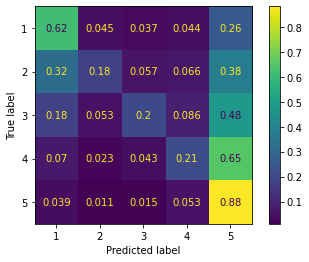

In [11]:
knc.fit(Xtrain, Ytrain)
Yguess = knc.predict(Xtrain)
precision = skm.precision_score(Ytrain, Yguess, average=None)
recall = skm.recall_score(Ytrain, Yguess, average=None)
f1_measure = skm.f1_score(Ytrain, Yguess, average=None)
accuracy = skm.accuracy_score(Ytrain, Yguess)
for i in range(len(puntajes)): 
    print('Para la clase {0}, las métricas son: Precisión = {1}, Cobertura = {2}, F1-medida = {3}'
          .format(puntajes[i], precision[i], recall[i], f1_measure[i]))
print('La exactitud del algoritmo es de', accuracy)
skm.confusion_matrix(Ytrain, Yguess)
skm.plot_confusion_matrix(knc, Xtrain, Ytrain, normalize='true')
plt.show()

Luego lo aplicamos sobre nuestro conjunto de prueba. Los resultados, aunque sutilmente diferentes, son consistentes. 

Para la clase 1, las métricas son: Precisión = 0.41234439834024894, Cobertura = 0.5431811970483739, F1-medida = 0.46880528364193885
Para la clase 2, las métricas son: Precisión = 0.17873100983020554, Cobertura = 0.09541984732824428, F1-medida = 0.1244167962674961
Para la clase 3, las métricas son: Precisión = 0.23535676251331203, Cobertura = 0.11157859306630764, F1-medida = 0.1513871446512159
Para la clase 4, las métricas son: Precisión = 0.23112053498613602, Cobertura = 0.1261012725816499, F1-medida = 0.1631736526946108
Para la clase 5, las métricas son: Precisión = 0.7429686563842717, Cobertura = 0.8585275151323337, F1-medida = 0.7965789063145241
La exactitud del algoritmo es de 0.6291659831152279


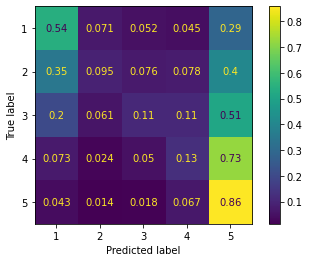

In [12]:
Ypred = knc.predict(Xtest)
precision = skm.precision_score(Ytest, Ypred, average=None)
recall = skm.recall_score(Ytest, Ypred, average=None)
f1_measure = skm.f1_score(Ytest, Ypred, average=None)
accuracy = skm.accuracy_score(Ytest, Ypred)
for i in range(len(puntajes)): 
    print('Para la clase {0}, las métricas son: Precisión = {1}, Cobertura = {2}, F1-medida = {3}'
          .format(puntajes[i], precision[i], recall[i], f1_measure[i]))
print('La exactitud del algoritmo es de', accuracy)
skm.confusion_matrix(Ytest, Ypred)
skm.plot_confusion_matrix(knc, Xtest, Ytest, normalize='true')
plt.show()

Para asegurarnos de que el valor más adecuado para el hiperparámetro es k = 6, construimos varios algoritmos con valores diferentes de k y calculamos sus respecivas métricas. 

In [13]:
precscores, cobscores, f1scores = [], [], []
for n in range(1, 11): 
    print('Número de vecinos:', n)
    knc0 = KNeighborsClassifier(n_neighbors=n)
    knc0 = knc0.fit(Xtrain, Ytrain)
    Ypred0 = knc0.predict(Xtest)
    precision = skm.precision_score(Ytest, Ypred0, average=None)
    recall = skm.recall_score(Ytest, Ypred0, average=None)
    f1_measure = skm.f1_score(Ytest, Ypred0, average=None)
    accuracy = skm.accuracy_score(Ytest, Ypred0)
    for i in range(len(puntajes)): 
        precscores += [precision]
        cobscores += [recall]
        f1scores += [f1_measure]
        print('Métricas Score {0}: Prec. = {1}, Cob. = {2}, F1-M. = {3}'
              .format(puntajes[i], precision[i], recall[i], f1_measure[i]))
    print('Exactitud:', accuracy)
    print('--------------------------------------------------------------------------------------------------------')

Número de vecinos: 1
Métricas Score 1: Prec. = 0.3734194242668819, Cob. = 0.3793386171084996, F1-M. = 0.376355748373102
Métricas Score 2: Prec. = 0.1414448669201521, Cob. = 0.13311068702290077, F1-M. = 0.13715128425709722
Métricas Score 3: Prec. = 0.14627949183303085, Cob. = 0.13564456411982498, F1-M. = 0.1407614390499476
Métricas Score 4: Prec. = 0.19673308203195117, Cob. = 0.1950698585031592, F1-M. = 0.1958979400330667
Métricas Score 5: Prec. = 0.7362922752479888, Cob. = 0.7458756972742019, F1-M. = 0.7410530039502388
Exactitud: 0.5557462488800272
--------------------------------------------------------------------------------------------------------
Número de vecinos: 2
Métricas Score 1: Prec. = 0.3389121338912134, Cob. = 0.5202241049467068, F1-M. = 0.41043609508921347
Métricas Score 2: Prec. = 0.1148285137861466, Cob. = 0.1629293893129771, F1-M. = 0.1347140039447732
Métricas Score 3: Prec. = 0.1368872220733994, Cob. = 0.1719959609559071, F1-M. = 0.15244630071599044
Métricas Score 4:

Finalmente, graficamos los registros de prueba según sus valores de Main Text Polarity y Summary Text Polarity y asignamos una etiqueta según el Score que les asignó el modelo. 

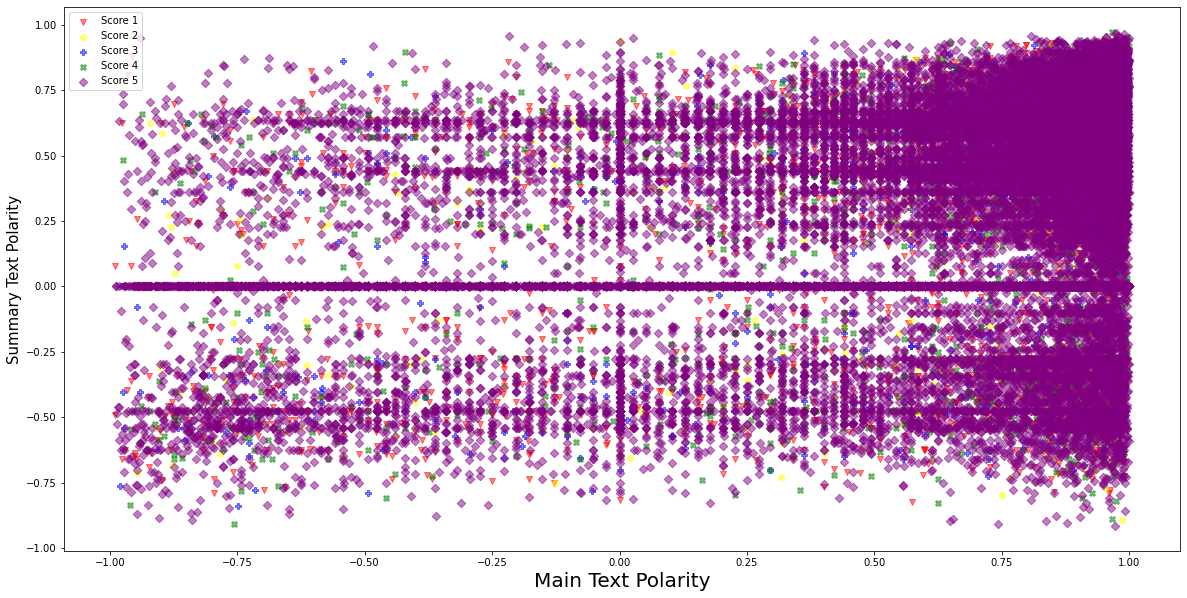

In [16]:
YpredDF = pd.DataFrame(Ypred, columns=['Value'])
plt.figure(figsize=(20, 10))
for n in range(len(puntajes)):
    records = YpredDF[YpredDF['Value'] == (n+1)].index
    sector = refdata.iloc[records]
    markers = ['v', 'o', 'P', 'X', 'D']
    colors = ['red', 'yellow', 'blue', 'green', 'purple']
    plt.scatter(sector['Main Text Polarity'], sector['Summary Text Polarity'], marker = markers[n], c = colors[n], alpha=0.5)
plt.xlabel('Main Text Polarity', fontsize=20)
plt.ylabel('Summary Text Polarity', fontsize=15)
plt.legend(['Score 1', 'Score 2', 'Score 3', 'Score 4', 'Score 5'])
plt.show()